## Exercise 1

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy

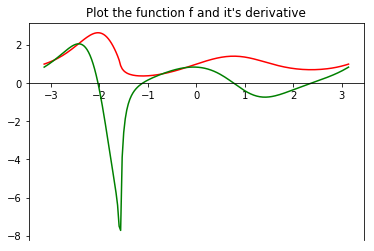

In [295]:
x = sy.symbols('x')
f = lambda x : (np.sin(x) + 1) ** (np.sin(np.cos(x)))
g = sy.diff((sy.sin(x) + 1) ** (sy.sin(sy.cos(x))), x)
f_prime = sy.lambdify(x, g)
xspace = np.linspace(-np.pi, np.pi, 200)
fig, ax = plt.subplots()
ax.plot(xspace, f(xspace), 'r')
ax.plot(xspace, f_prime(xspace), 'g')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.set_title("Plot the function f and it's derivative")
plt.show()

## Problem 2

In [81]:
def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)

def backward_1(f, x, h):
    return ((f(x) - f(x - h)) / h)

def backward_2(f, x, h):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)

def centered_2(f, x, h):
    return ((f(x + h) - f(x - h)) / (2*h))

def centered_4(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)


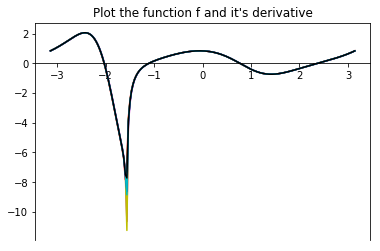

In [82]:
xspace = np.linspace(-np.pi, np.pi, 200)
f = lambda x : (np.sin(x) + 1) ** (np.sin(np.cos(x)))
h = 0.01
for_1 = forward_1(f, xspace, h)
for_2 = forward_2(f, xspace, h)
bac_1 = backward_1(f, xspace, h)
bac_2 = backward_2(f, xspace, h)
cen_2 = centered_2(f, xspace, h)
cen_4 = centered_4(f, xspace, h)

#Plot the functions derivatives
fig, ax = plt.subplots()
ax.plot(xspace, for_1, 'r')
ax.plot(xspace, for_2, 'g')
ax.plot(xspace, bac_1, 'm')
ax.plot(xspace, bac_2, 'y')
ax.plot(xspace, cen_2, 'b')
ax.plot(xspace, cen_4, 'c')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.set_title("Plot the function f and it's derivative")

ax.plot(xspace, f_prime(xspace), 'k')
plt.show()
#These are all plotted on top of each other.  Therefore they all give
#the same value.  This shows they compare pretty well. ( If time plot in different subplots)

## Problem 3

In [83]:
def errorpoints(f, f_prime, g, x, hspace):
    error = np.zeros_like(hspace)
    for i in range(len(hspace)):
        error[i] = abs(f_prime(x) - g(f, x, hspace[i]))
    return error

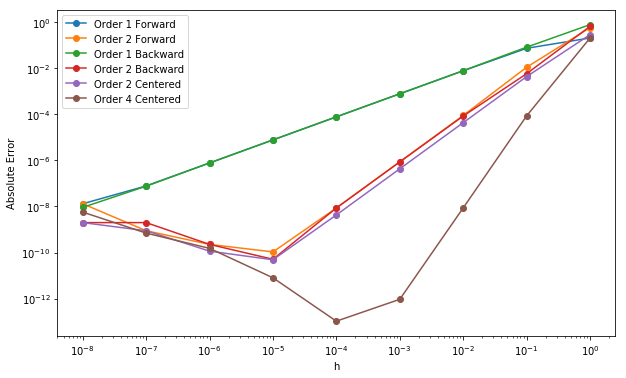

In [110]:
hspace = np.logspace(-8, 0, 9)
x_0 = 1
error1 = errorpoints(f, f_prime, forward_1, x_0, hspace)
error2 = errorpoints(f, f_prime, forward_2, x_0, hspace)
error3 = errorpoints(f, f_prime, backward_1, x_0, hspace)
error4 = errorpoints(f, f_prime, backward_2, x_0, hspace)
error5 = errorpoints(f, f_prime, centered_2, x_0, hspace)
error6 = errorpoints(f, f_prime, centered_4, x_0, hspace)

plt.figure(figsize=(10, 6))
plt.loglog(hspace, error1, 'o-', label= "Order 1 Forward")
plt.loglog(hspace, error2, 'o-', label= "Order 2 Forward")
plt.loglog(hspace, error3, 'o-', label= "Order 1 Backward")
plt.loglog(hspace, error4, 'o-', label= "Order 2 Backward")
plt.loglog(hspace, error5, 'o-', label= "Order 2 Centered")
plt.loglog(hspace, error6, 'o-', label= "Order 4 Centered")
plt.legend(loc="upper left")
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.show()



## Problem 4

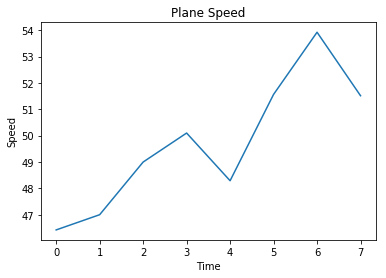

[(7.0, 46.42420062213374),
 (8.0, 47.001039380953344),
 (9.0, 48.99880514036797),
 (10.0, 50.09944162965227),
 (11.0, 48.290350838204944),
 (12.0, 51.564559049272255),
 (13.0, 53.923033545053535),
 (14.0, 51.51480056963696)]

In [187]:
planes = np.load("plane.npy")
time = planes[:, 0]
alpha = np.deg2rad(planes[:, 1])
beta = np.deg2rad(planes[:, 2])
a = 500
x = a * np.tan(beta) / (np.tan(beta) - np.tan(alpha))
y = a * np.tan(beta) * np.tan(alpha) / (np.tan(beta) - np.tan(alpha))
x_der = np.zeros_like(time)
x_der[0] = (x[1] - x[0])
for i in range(len(position) - 2):
    x_der[i + 1] = (x[i + 2] - x[i]) / 2
x_der[-1] = x[-1] - x[-2]

y_der = np.zeros_like(time)
y_der[0] = (y[1] - y[0])
for i in range(len(position) - 2):
    y_der[i + 1] = (y[i + 2] - y[i]) / 2
y_der[-1] = y[-1] - y[-2]

speed = np.sqrt(x_der ** 2 + y_der ** 2)
plt.plot(range(len(speed)), speed)
plt.xlabel("Time")
plt.ylabel("Speed")
plt.title("Plane Speed")
plt.show()
list(zip(time, speed))


## Problem 5


In [237]:
def jacobian(f, x, h):
    jacobian = np.empty((len(f(x)), len(x)))
    I = np.identity(len(x))
    for j in range(len(x)):
        jacobian[:, j] = ((f(x + h*I[j]) - f(x - h*I[j])) / (2*h))
    return jacobian

In [239]:
f = lambda xvec: np.array([xvec[0] ** 2, xvec[0] ** 3 - xvec[1]])
x_vec = np.array([2, 1])
jacobian(f, x_vec, 0.001)

array([[ 4.      ,  0.      ],
       [12.000001, -1.      ]])

In [240]:
x = sy.symbols('x')
y = sy.symbols('y')
f_sy = sy.Matrix([x**2, x**3 - y])
f_sy.jacobian([x, y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

## Problem 6

/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


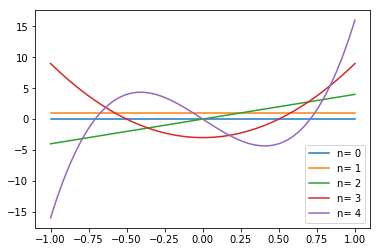

In [249]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

# def cheby_poly(x, n):
#     poly = anp.zeros((len(x), n + 1))
#     poly[:, 0] = anp.ones_like(x)
#     if n > 0:
#         poly[:, 1] = x
#         if n > 1:
#             for i in range(n - 2):
#                 poly[i + 2] = 2 * x * poly[i + 1] - poly[i]
#     return poly

def cheby_poly(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * cheby_poly(x, n - 1) - cheby_poly(x, n - 2)

def cheby_der(x, n):
    df = elementwise_grad(cheby_poly)
    return df(x, n)

xspace = anp.linspace(-1, 1, 50)
n = np.array([0, 1, 2, 3, 4])
for i in range(len(n)):
    plt.plot(xspace, cheby_der(xspace, n[i]), label=f"n= {n[i]}")
plt.legend()
plt.show()

## Problem 7:

In [271]:
import time 
from autograd import grad

def time_der(N):
    times = np.zeros((3, N))
    error = np.zeros((2, N))
    h = 0.0001
    for i in range(N):
        x = np.random.random()
        start_time1 = time.time()
        real_prime = f_prime(x)
        end_time1 = time.time()
        times[0, i] = end_time1 - start_time1
        
        f = lambda x : (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
        start_time2 = time.time()
        prime2 = centered_4(f, x, h)
        error[0, i] = abs(real_prime - prime2)
        end_time2 = time.time()
        times[1, i] = end_time2 - start_time2
        
        start_time3 = time.time()
        prime3 = grad(f)(x)
        error[1, i] = abs(real_prime - prime3)
        end_time3 = time.time()
        times[2, i] = end_time3 - start_time3
    return times, error

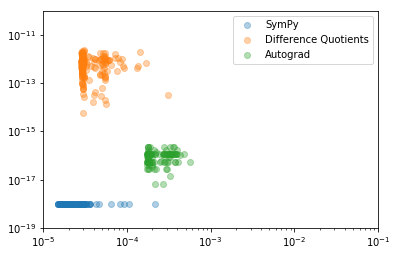

In [296]:
times, error = time_der(200)
plt.scatter(times[0], np.full(len(times[0]), 1e-18), alpha=0.35, label = 'SymPy')
plt.scatter(times[1], error[0], alpha=0.35, label = 'Difference Quotients')
plt.scatter(times[2], error[1], alpha=0.35, label = 'Autograd')
plt.xlim([1e-5, 1e-1])
plt.ylim([1e-19, 1e-10])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [297]:
# This is only different because I used sy.lambdify which makes 
# it fast.  This isn't wrong, and actually really interesting, so I kept it.